In [1]:
import pandas as pd

In [2]:
import numpy as np

**Reading the given csv file**


In [3]:
df=pd.read_csv('epa_air_quality_annual_summary.csv',low_memory=False)
print(df)

        state_code  county_code  site_num  parameter_code  poc   latitude   
0               20           57         1           82134    1  37.771964  \
1               18          163        12           42401    1  38.021727   
2               40           31      9000           88152    1  34.732404   
3               32            3       561           42601    1  36.163959   
4               13          127      3001           12154    1  31.185187   
...            ...          ...       ...             ...  ...        ...   
1048570         48          141        53           43290    1  31.758532   
1048571          2          290      9000           88180    1  66.930930   
1048572         24            3      2002           42401    1  39.159831   
1048573          6           29      6001           63301    1  35.503587   
1048574         18           97        57           42401    1  39.749019   

          longitude  datum       parameter_name sample_duration  ...   
0  

**1**  **Stastical analysis of the Data frame**

In [4]:
print(df.describe())

        county_code      site_num  parameter_code           poc      latitude   
count  1.048575e+06  1.048575e+06    1.048575e+06  1.048575e+06  1.048569e+06  \
mean   8.346507e+01  1.094792e+03    5.775796e+04  2.407531e+00  3.794682e+01   
std    9.346740e+01  2.284921e+03    2.337348e+04  3.590953e+00  5.700165e+00   
min    1.000000e+00  1.000000e+00    1.110100e+04  1.000000e+00  0.000000e+00   
25%    2.500000e+01  7.000000e+00    4.324200e+04  1.000000e+00  3.399958e+01   
50%    6.100000e+01  2.900000e+01    4.520800e+04  1.000000e+00  3.866679e+01   
75%    1.110000e+02  1.004000e+03    8.810100e+04  3.000000e+00  4.176394e+01   
max    9.010000e+02  9.998000e+03    9.214200e+04  9.900000e+01  7.029195e+01   

          longitude          year  observation_count  observation_percent   
count  1.048569e+06  1.048575e+06       1.048575e+06         1.048575e+06  \
mean  -9.458741e+01  2.003125e+03       1.797827e+03         7.849822e+01   
std    1.743137e+01  9.109472e+00      

**2** **Graphical comparison of diffrent features(columns)**

**Graph 1**

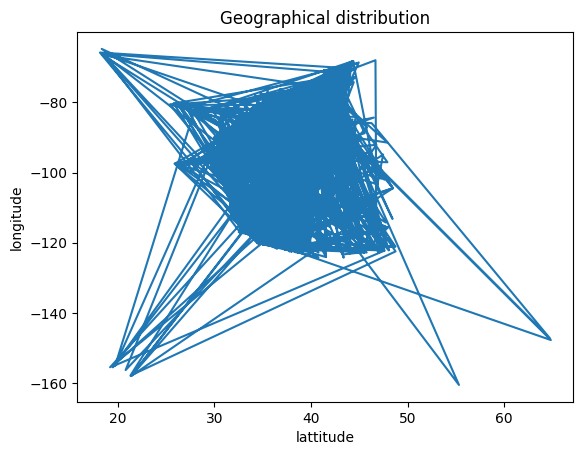

In [5]:
import matplotlib.pyplot as plt
df = pd.read_csv('epa_air_quality_annual_summary.csv',nrows=1000)
numeric_columns=df.select_dtypes(include=np.number)
plt.plot(numeric_columns['latitude'],numeric_columns['longitude'])
plt.title('Geographical distribution')
plt.xlabel('lattitude')
plt.ylabel('longitude')
plt.show()

**Graph 2**

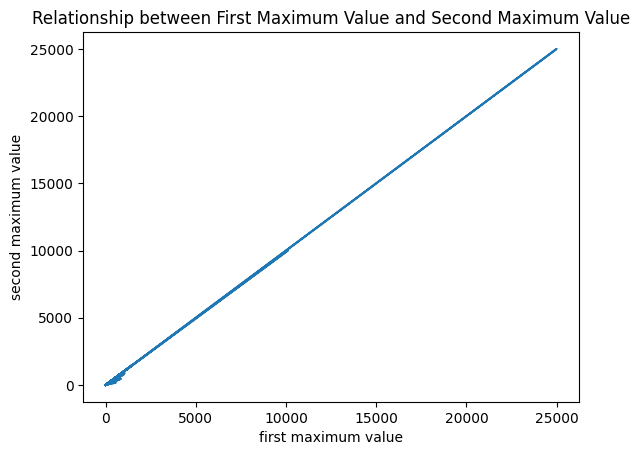

In [6]:
plt.plot(numeric_columns['first_max_value'],numeric_columns['second_max_value'])
plt.title('Relationship between First Maximum Value and Second Maximum Value')
plt.xlabel("first maximum value")
plt.ylabel("second maximum value")
plt.show()

**Graph 3**

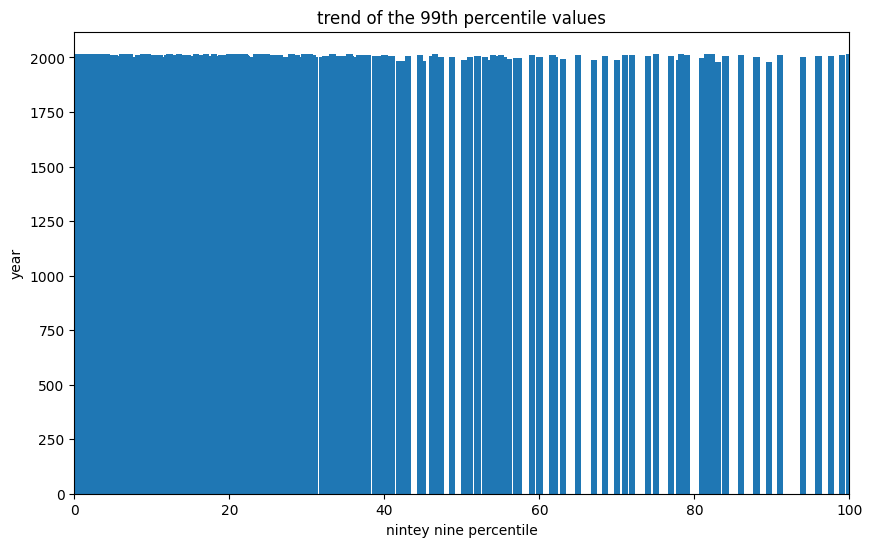

In [7]:
plt.figure(figsize=(10,6))
plt.bar(numeric_columns['ninety_nine_percentile'],numeric_columns['year'])
plt.title('trend of the 99th percentile values')
plt.xlabel('nintey nine percentile')
plt.ylabel('year')
plt.xlim(0,100)
plt.show()


**Graph 4**

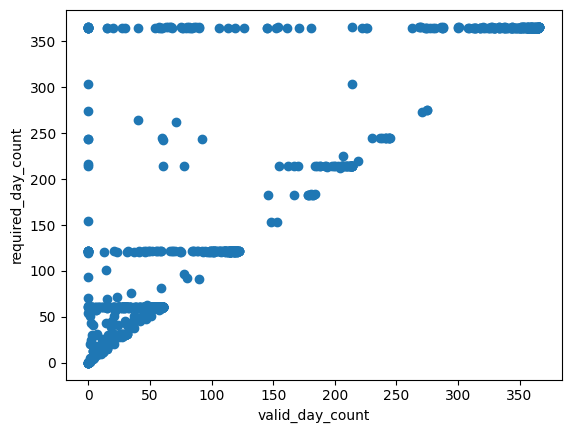

In [8]:
valid_day_count=numeric_columns['valid_day_count']
required_day_count=numeric_columns['required_day_count']
plt.scatter(numeric_columns['valid_day_count'],numeric_columns['required_day_count'])
plt.xlabel('valid_day_count')
plt.ylabel('required_day_count')
plt.show()


**3**  **Checking the null values in the data.**

In [9]:
df=pd.read_csv("epa_air_quality_annual_summary.csv",low_memory=False)
null_counts=df.isnull().sum()
print(null_counts)

state_code                                0
county_code                               0
site_num                                  0
parameter_code                            0
poc                                       0
latitude                                  6
longitude                                 6
datum                                     0
parameter_name                            0
sample_duration                           0
pollutant_standard                   782422
metric_used                               0
method_name                          111165
year                                      0
units_of_measure                          0
event_type                                0
observation_count                         0
observation_percent                       0
completeness_indicator                    0
valid_day_count                           0
required_day_count                        0
exceptional_data_count                    0
null_data_count                 


**4** **Removing the null value rows from first data frame.**

In [10]:
df2=df.dropna()#creating new data frame with no null values
print(df2)

        state_code  county_code  site_num  parameter_code  poc   latitude   
2943            30          111        81           42101    1  45.783285  \
8456             6           37      1301           42101    1  33.928990   
12458           32           31        22           42101    1  39.532004   
13449           27          123        50           42101    1  44.955800   
17180           39           49        36           42101    1  39.959561   
...            ...          ...       ...             ...  ...        ...   
1034909          6           67         6           42101    1  38.613779   
1035324         36           47        71           42101    1  40.695783   
1042644         21          111        75           42101    1  38.193600   
1046643          6           25      1003           42101    1  32.792220   
1047582         39           35        48           42101    1  41.499840   

          longitude  datum   parameter_name        sample_duration  ...   


In [11]:
df2.to_csv("air_quality.csv")#a new csv file of same data ,with no rows with null values

**5**  **Using Feature scaling by normalisation**

In [45]:
#to find the numerical colums in air_quality.csv file
df = pd.read_csv('air_quality.csv')
numeric_columns=df.select_dtypes(include=np.number)

In [46]:
from  sklearn.preprocessing  import MinMaxScaler

In [57]:
#reading the csv with numerical_columns
df2=pd.read_csv('air_quality.csv',usecols=numeric_columns)
df2.to_csv("air_quality_int.csv")

In [56]:
scaling =MinMaxScaler()
scaled=scaling.fit_transform(df2)
print(scaled)
print(" The maximum value :",scaled.max())
print(" The minimum value :",scaled.min())

[[0.         0.53703704 0.14492754 ... 0.29545455 0.29032258 0.28571429]
 [0.00527742 0.09259259 0.04743083 ... 0.56818182 0.48387097 0.57142857]
 [0.00910841 0.57407407 0.03952569 ... 0.15909091 0.09677419 0.07142857]
 ...
 [0.99527301 0.37037037 0.14492754 ... 0.09090909 0.09677419 0.14285714]
 [0.99910112 0.09259259 0.03162055 ... 0.04545455 0.         0.        ]
 [1.         0.7037037  0.04479578 ... 0.43181818 0.41935484 0.35714286]]
 The maximum value : 1.0000000000000002
 The minimum value : 0.0


In the provided output, the values are between 0 and 1, which indicates that normalization has been applied to the dataset.

By applying normalization, you have ensured that each feature is rescaled to a common range, making it easier to interpret and analyze the dataset without any feature dominating the others due to differences in scale.

The advantage of normalization is that it maintains the relative relationships between different values within each feature(columns) while            manitining  all the data on a  comparable scale

**Correlation matrix**

In [58]:
df2.head()

,Unnamed: 0,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,year,observation_count,...,fourth_max_value,first_max_non_overlapping_value,second_max_non_overlapping_value,ninety_nine_percentile,ninety_eight_percentile,ninety_five_percentile,ninety_percentile,seventy_five_percentile,fifty_percentile,ten_percentile
0,2943,30,111,81,42101,1,45.783285,-108.503469,1997,8539,...,5.1,5.2,4.9,3.0,2.7,2.2,1.8,1.3,0.9,0.4
1,8456,6,37,1301,42101,1,33.928990,-118.210710,1999,8754,...,11.0,11.2,11.1,8.2,7.4,5.8,4.4,2.5,1.5,0.8
2,12458,32,31,22,42101,1,39.532004,-119.784982,2005,8715,...,3.2,3.2,3.2,2.3,2.0,1.6,1.3,0.7,0.3,0.1
3,13449,27,123,50,42101,1,44.955800,-93.145850,1999,8119,...,5.1,5.3,5.2,3.3,2.8,2.3,2.0,1.5,1.1,0.5
4,17180,39,49,36,42101,1,39.959561,-83.001817,2007,6757,...,1.1,1.1,1.1,0.7,0.6,0.5,0.5,0.4,0.3,0.2


**Displaying the correlation matrix**

In [60]:
corr=df2.corr()
corr

,Unnamed: 0,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,year,observation_count,...,fourth_max_value,first_max_non_overlapping_value,second_max_non_overlapping_value,ninety_nine_percentile,ninety_eight_percentile,ninety_five_percentile,ninety_percentile,seventy_five_percentile,fifty_percentile,ten_percentile
Unnamed: 0,1.000000,0.039483,0.094885,0.069990,NaN,0.002473,-0.039118,0.088754,0.043861,0.008284,...,-0.003787,0.001493,-0.002409,-0.041418,-0.036646,-0.044299,-0.045851,-0.024703,-0.002958,0.020170
state_code,0.039483,1.000000,0.313055,-0.162081,NaN,-0.063323,0.276085,0.382147,0.023817,0.185270,...,-0.004783,-0.002893,-0.024856,-0.123366,-0.146087,-0.168508,-0.162493,-0.130781,-0.097314,-0.088887
county_code,0.094885,0.313055,1.000000,-0.080023,NaN,0.011766,-0.079332,0.099166,0.073399,0.090883,...,-0.106934,-0.101407,-0.108250,-0.144273,-0.152754,-0.163806,-0.168563,-0.162064,-0.151537,-0.175940
site_num,0.069990,-0.162081,-0.080023,1.000000,NaN,-0.059460,-0.202770,-0.150227,0.004622,0.002667,...,-0.149335,-0.149387,-0.146389,-0.119254,-0.113336,-0.113866,-0.115477,-0.144216,-0.164976,-0.158087
parameter_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poc,0.002473,-0.063323,0.011766,-0.059460,NaN,1.000000,-0.075569,0.007532,0.059757,0.003697,...,0.027757,0.027708,0.037403,0.010072,0.006575,-0.001979,-0.009226,-0.005742,0.001261,0.008087
latitude,-0.039118,0.276085,-0.079332,-0.202770,NaN,-0.075569,1.000000,0.161869,-0.075152,-0.060018,...,0.215003,0.217430,0.187485,0.144655,0.130967,0.114505,0.116988,0.136833,0.155666,0.176605
longitude,0.088754,0.382147,0.099166,-0.150227,NaN,0.007532,0.161869,1.000000,-0.040985,0.159049,...,-0.113963,-0.113266,-0.109885,-0.191785,-0.200960,-0.195655,-0.169212,-0.103333,-0.037118,0.034244
year,0.043861,0.023817,0.073399,0.004622,NaN,0.059757,-0.075152,-0.040985,1.000000,-0.089534,...,-0.637697,-0.635501,-0.636529,-0.623953,-0.605253,-0.591865,-0.586734,-0.577094,-0.536554,-0.463470
observation_count,0.008284,0.185270,0.090883,0.002667,NaN,0.003697,-0.060018,0.159049,-0.089534,1.000000,...,0.059210,0.053880,0.053455,-0.008158,-0.016491,-0.021523,-0.017535,-0.017184,-0.016264,0.009617
